In [1]:
#
# labels[0] => Week #
# labels[1] => Day of Week
# labels[2] => Backup Start Time - Hour of Day
# labels[3] => Work-Flow-ID
# labels[4] => File Name
# labels[5] => Size of Backup (GB)
# labels[6] => Backup Time (hour)
# 
%matplotlib inline
import numpy as np
import pandas as pd

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
# for i in range(len(labels)):    
#     Data = OneDimensionTransfer(labels[i], Data)
    
# newData = Data

def OneHotEncoding(label, data):
    tmpData = pd.get_dummies(data,columns=[str(label)])
    return tmpData

# newData = OneHotEncoding(labels[1], newData)
# print newData

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [5]:
#RMSE for all scalar

import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns

uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
for i in range(len(labels)):    
    Data = OneDimensionTransfer(labels[i], Data)
    
Training = Data.copy()
Training.drop(labels[6],1,inplace = True)
Sample = Training.copy()
Target = Training.pop(labels[5])


def CalculateRMSE(data,predict):
    return sp.sqrt(sp.mean((predict - data) ** 2))
def FoldRMSE(data,lin_reg):
    target = data.pop('Size of Backup (GB)')
    predict = lin_reg.predict(data)
    return CalculateRMSE(predict,target)


def FoldMSE(data,lin_reg):
    target = data.pop('Size of Backup (GB)')
    predict = lin_reg.predict(data)
    return mean_squared_error(target,predict)

In [94]:

def PlotCompare(training_data,lin_reg):
    prediction = cross_val_predict(lin_reg, training_data, Target, cv = 10)
    area = np.pi * (1)**2/4  # 0 to 15 point radii
    plt.scatter(range(18588), prediction, s=area, label='prediction')
    plt.scatter(range(18588), Target, s=area, label='True Value')
    plt.legend()
    plt.show()

    area = np.pi * (1 )**2/4  # 0 to 15 point radii
    plt.scatter(range(18588), prediction, s=area, label='prediction')
    plt.scatter(range(18588), Target-prediction, s=area, label='Residuals')
    plt.legend()
    plt.show()

#     fig, ax = plt.subplots()
#     ax.scatter(Target, Predict, s=10, marker = 'o', linewidths = 1)
#     ax.plot([Target.min(), Target.max()], [Target.min(), Target.max()], 'k--', lw = 4)
#     ax.set_xlabel('Measured size', fontsize = 20)
#     ax.set_ylabel('Predicted size', fontsize = 20)
#     plt.title('Fitted values vs. Actual values', fontsize = 20)
#     print "Fitted values vs. Actual values:"
#     plt.show()



#     fig, ax = plt.subplots()
#     ax.scatter(Predict, Predict-Target)
#     ax.set_xlabel('Predicted size', fontsize = 20)
#     ax.set_ylabel('Residual', fontsize = 20)
#     plt.title('Residuals vs. Fitted value', fontsize = 20)
#     print "Residuals vs. Fitted value"
#     plt.show()

In [95]:
import matplotlib.pyplot as plt 
 
kf = KFold(n_splits=10, shuffle = False)
kf.get_n_splits(Sample)
index = 0
for train_index, test_index in kf.split(Sample):
    train_set = Sample.iloc[train_index, :]
    test_set = Sample.iloc[test_index, :]    
    train = train_set.copy()
    target = train.pop('Size of Backup (GB)')
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg.fit(train,target)
    index = index + 1
    print 'Fold',index,'train_RMSE', FoldRMSE(train_set,lin_reg),'test_RMSE', FoldRMSE(test_set,lin_reg)
  


Fold 1 train_RMSE 0.10393858396050151 test_RMSE 0.10856354259422377
Fold 2 train_RMSE 0.10475965294901611 test_RMSE 0.10123965075087611
Fold 3 train_RMSE 0.1039705690187425 test_RMSE 0.10818843055125366
Fold 4 train_RMSE 0.10479786936473291 test_RMSE 0.10075585651740757
Fold 5 train_RMSE 0.10397163515851572 test_RMSE 0.10819709197332206
Fold 6 train_RMSE 0.10481515905452862 test_RMSE 0.10058693002566713
Fold 7 train_RMSE 0.10399598739966495 test_RMSE 0.10799226734028387
Fold 8 train_RMSE 0.10481364331307322 test_RMSE 0.10060755028273746
Fold 9 train_RMSE 0.10397812819039667 test_RMSE 0.10816280175662442
Fold 10 train_RMSE 0.10483669246208886 test_RMSE 0.10051002557718589


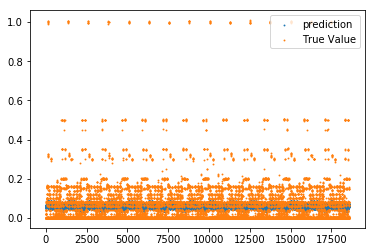

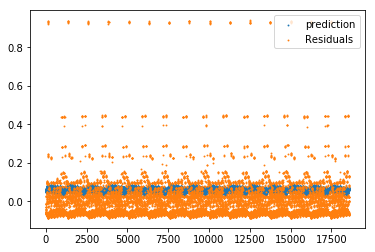

In [96]:
Lin_reg = LinearRegression()
Lin_reg.fit(Training,Target)
PlotCompare(Training,Lin_reg)

[[0.23146804 0.         0.14632979 0.         0.        ]
 [0.23146804 0.         0.14632979 1.41298277 1.38520415]
 [0.23146804 0.         0.14632979 1.41298277 1.50063783]
 ...
 [3.4720206  3.0069357  3.07292557 2.82596553 3.00127565]
 [3.4720206  3.0069357  3.07292557 2.82596553 2.88584197]
 [3.4720206  3.0069357  3.07292557 2.82596553 2.77040829]]


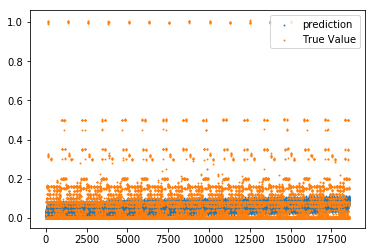

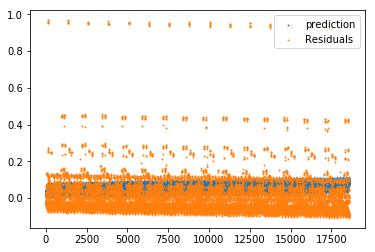

In [97]:
#standard
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = True, with_mean= False, with_std=True)
scaler.fit(Training)
Standard_Training = scaler.transform(Training)
Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(Standard_Training,Target)

print Standard_Training
PlotCompare(Standard_Training,Lin_reg)

In [98]:
from sklearn.feature_selection import f_regression
import numpy as np
f_test,_ = f_regression(Standard_Training,Target) 
print f_test
f_test = np.array(f_test)
f_label = f_test.argsort()[-3:][::-1]
print
for i in f_label:
    print str(labels[i])

[8.45006257e-03 3.88163798e+01 1.50740934e+02 2.61386654e+01
 2.53200943e+01]

Backup Start Time - Hour of Day
Day of Week
Work-Flow-ID


[[0.         0.14632979 0.        ]
 [0.         0.14632979 1.41298277]
 [0.         0.14632979 1.41298277]
 ...
 [3.0069357  3.07292557 2.82596553]
 [3.0069357  3.07292557 2.82596553]
 [3.0069357  3.07292557 2.82596553]]


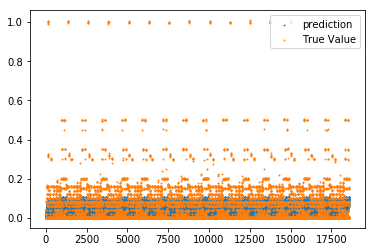

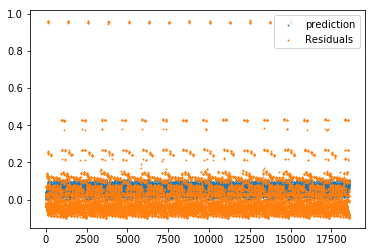

In [99]:
New_Training = Standard_Training[:,1:4]
print New_Training
Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(New_Training,Target)

Predict = cross_val_predict(Lin_reg, New_Training, Target, cv = 10)

PlotCompare(New_Training,Lin_reg)

In [88]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
f_test = mutual_info_regression(Standard_Training,Target) 
print f_test
f_test = np.array(f_test)
f_label = f_test.argsort()[-3:][::-1]
print
for i in f_label:
    print str(labels[i])

[0.         0.24011157 0.30118012 0.76887649 0.77135886]

File Name
Work-Flow-ID
Backup Start Time - Hour of Day


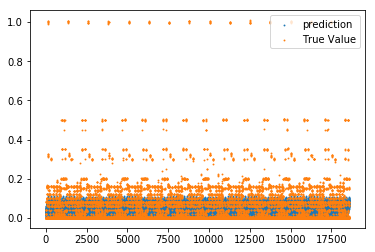

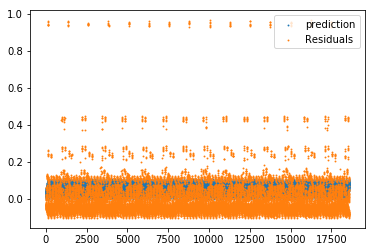

In [100]:
New_Training = Standard_Training[:,2:5]

Lin_reg = LinearRegression(fit_intercept = False)
Lin_reg.fit(New_Training,Target)

Predict = cross_val_predict(Lin_reg, New_Training, Target, cv = 10)

PlotCompare(New_Training,Lin_reg)

In [72]:
import itertools

Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]

def OneDimensionTransfer(label, data):
    if label == labels[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif label == labels[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif label == labels[4]:
        for i,j in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data
    
def OneHotEncoding(label, data):
    tmpData = pd.get_dummies(data,columns=[str(label)])
    return tmpData

def MakeCombinationData(data):
    lsts = list(itertools.product([0, 1], repeat=5))
    data_set = []
    for lst in lsts:
        tmp_data = data.copy()
        for index,item in enumerate(lst):
            if item == 0:
                tmp_data = OneDimensionTransfer(labels[index], tmp_data)
            else:
                tmp_data = OneHotEncoding(labels[index], tmp_data)
        data_set.append(tmp_data)
    return data_set,lsts

Data.drop(labels[6],1,inplace = True)
print type(Data)
Data_set, Lsts = MakeCombinationData(Data)


labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)
<class 'pandas.core.frame.DataFrame'>


In [73]:
import math
def CaculateTrainandTestRSME(data,shuffle,lin_reg):
    kf = KFold(n_splits=10,shuffle = shuffle)
    #kf.get_n_splits(data)
    train_MSE = 0
    test_MSE = 0
    for train_index, test_index in kf.split(data):
        train_set = data.iloc[train_index, :]
        test_set = data.iloc[test_index, :]
        
        train = train_set.copy()
        target = train.pop('Size of Backup (GB)')
        lin_reg_ = lin_reg
        lin_reg_.fit(train,target)
#         print 'train',train.shape
        train_MSE += FoldMSE(train_set,lin_reg_)
        test_MSE += FoldMSE(test_set,lin_reg_)
    return math.sqrt(train_MSE/10), math.sqrt(test_MSE/10)

Train_RMSE_set = []
Test_RMSE_set = []
for data in Data_set:
#     sample = data.copy()
#     target = data.pop('Size of Backup (GB)')
    lin_reg = LinearRegression()
#     lin_reg.fit(data,target)
    Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(data, False, lin_reg)
    Train_RMSE_set.append(Train_RMSE)
    Test_RMSE_set.append(Test_RMSE)

Type 0 (0, 0, 0, 0, 0)
Type 1 (0, 0, 0, 0, 1)
Type 2 (0, 0, 0, 1, 0)
Type 3 (0, 0, 0, 1, 1)
Type 4 (0, 0, 1, 0, 0)
Type 5 (0, 0, 1, 0, 1)
Type 6 (0, 0, 1, 1, 0)
Type 7 (0, 0, 1, 1, 1)
Type 8 (0, 1, 0, 0, 0)
Type 9 (0, 1, 0, 0, 1)
Type 10 (0, 1, 0, 1, 0)
Type 11 (0, 1, 0, 1, 1)
Type 12 (0, 1, 1, 0, 0)
Type 13 (0, 1, 1, 0, 1)
Type 14 (0, 1, 1, 1, 0)
Type 15 (0, 1, 1, 1, 1)
Type 16 (1, 0, 0, 0, 0)
Type 17 (1, 0, 0, 0, 1)
Type 18 (1, 0, 0, 1, 0)
Type 19 (1, 0, 0, 1, 1)
Type 20 (1, 0, 1, 0, 0)
Type 21 (1, 0, 1, 0, 1)
Type 22 (1, 0, 1, 1, 0)
Type 23 (1, 0, 1, 1, 1)
Type 24 (1, 1, 0, 0, 0)
Type 25 (1, 1, 0, 0, 1)
Type 26 (1, 1, 0, 1, 0)
Type 27 (1, 1, 0, 1, 1)
Type 28 (1, 1, 1, 0, 0)
Type 29 (1, 1, 1, 0, 1)
Type 30 (1, 1, 1, 1, 0)
Type 31 (1, 1, 1, 1, 1)
Type 14 RMSE 0.0885042607046


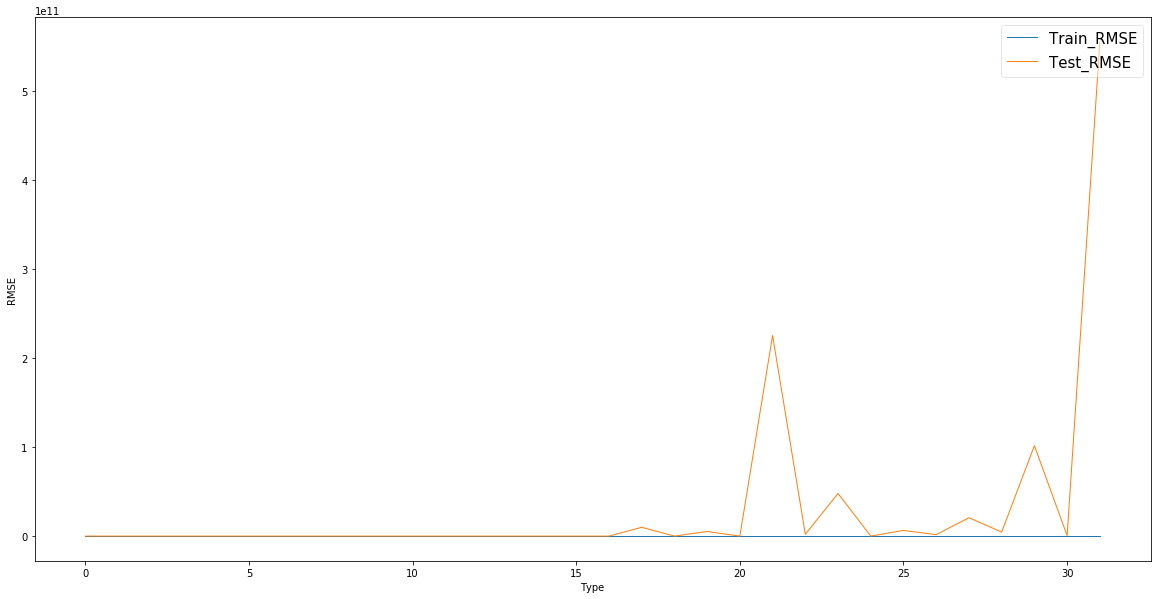

In [74]:
def Plot32Model(train_RMSE_set,test_RMSE_set):
    plt.figure(figsize = (20,10))
    plt.plot(range(32), train_RMSE_set, label = "Train_RMSE", linewidth = 1)
    plt.plot(range(32), test_RMSE_set, label = "Test_RMSE", linewidth = 1)
    plt.xlabel('Type')
    plt.ylabel('RMSE')
    plt.legend(loc = 1, fancybox = True, framealpha = 0.5, prop = {'size': 15})
    plt.show()

for i in range(len(Lsts)):
    print 'Type',str(i),Lsts[i]

print 'Type',Test_RMSE_set.index(min(Test_RMSE_set)),'RMSE',min(Test_RMSE_set)
Plot32Model(Train_RMSE_set,Test_RMSE_set)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


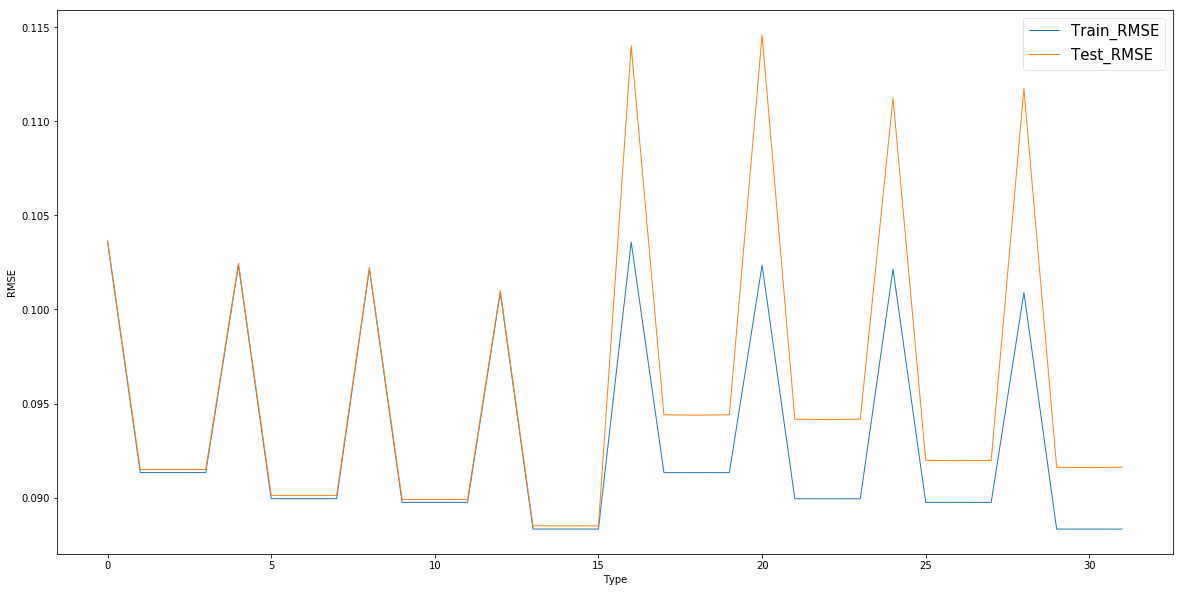

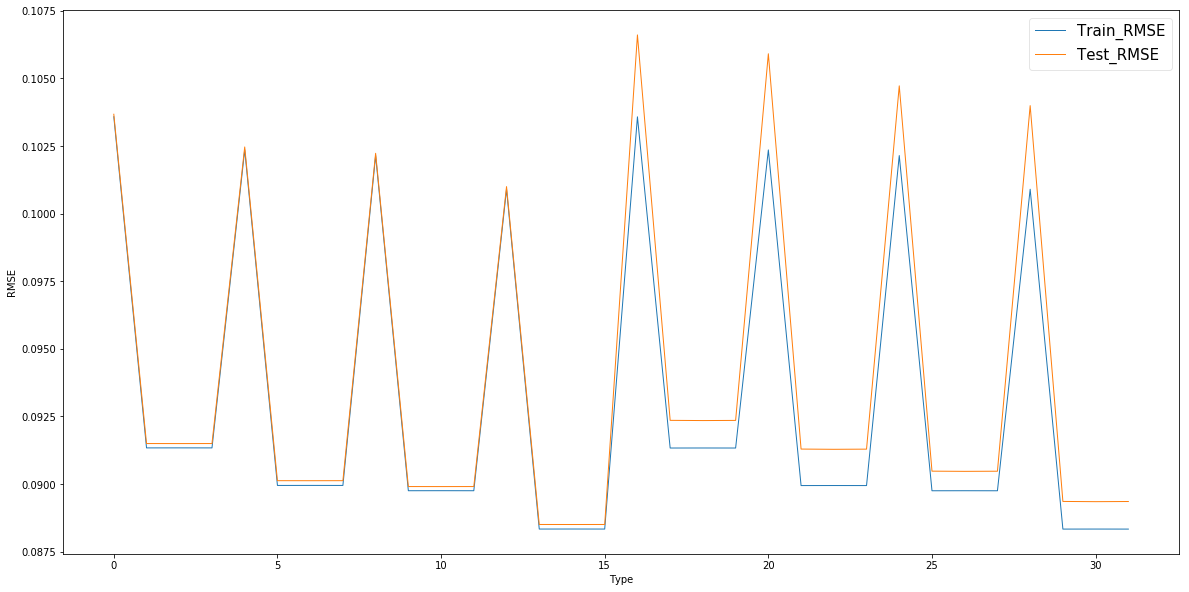

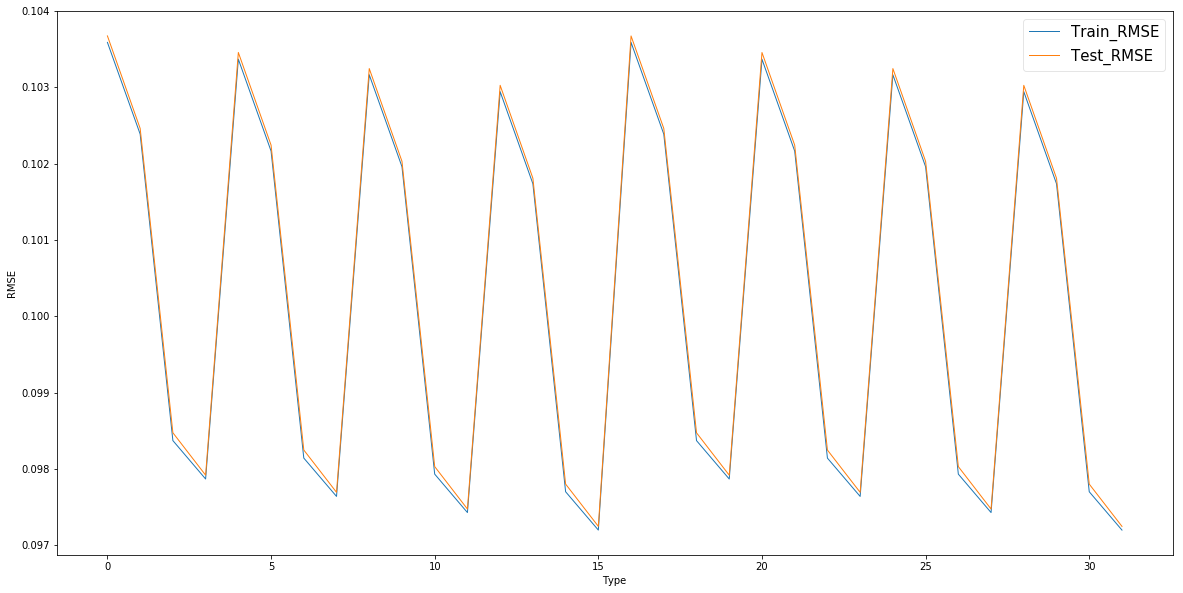

In [66]:
from sklearn.linear_model import Ridge
Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]
Data.drop(labels[6],1,inplace = True)
Data_set, Lsts = MakeCombinationData(Data)

def copy(data_set):
    tmp_data_set = []
    for data in data_set:
        tmp_data = data.copy()
        tmp_data_set.append(tmp_data)
    return tmp_data_set


for alpha in 0.001,1,10000:
    tmp_Data_set = copy(Data_set)
    Train_RMSE_set = []
    Test_RMSE_set = []
    for data in tmp_Data_set:
        sample = data.copy()
        target = data.pop('Size of Backup (GB)')
        lin_reg = Ridge(alpha = alpha)
#        lin_reg.fit(data,target)
        Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(sample,False,lin_reg)
        Train_RMSE_set.append(Train_RMSE)
        Test_RMSE_set.append(Test_RMSE)

    Plot32Model(Train_RMSE_set, Test_RMSE_set)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


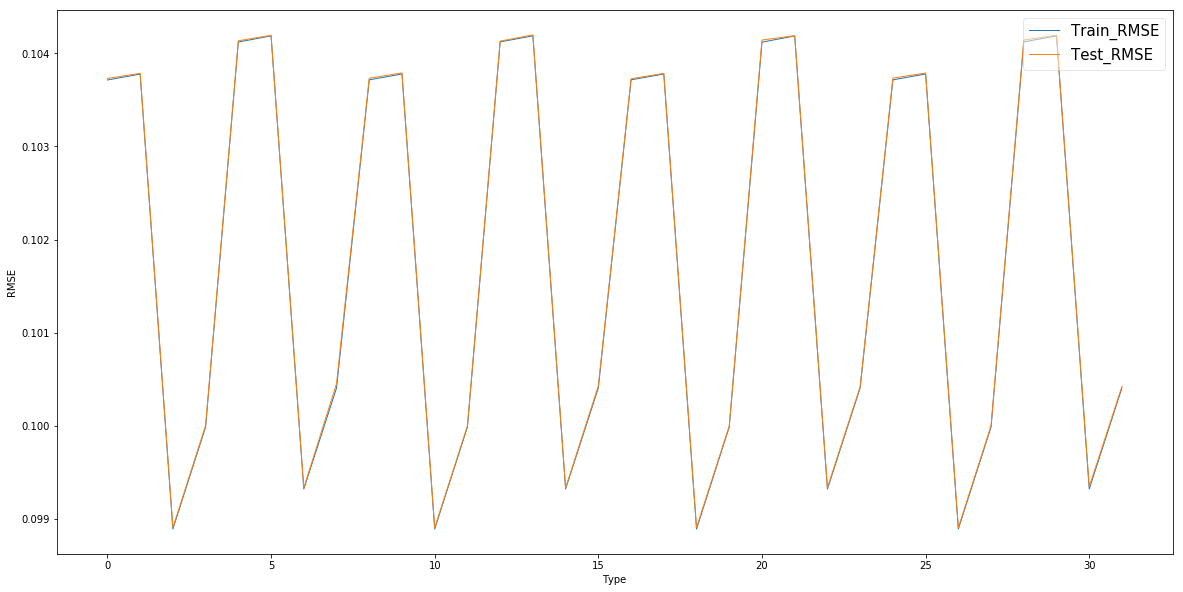

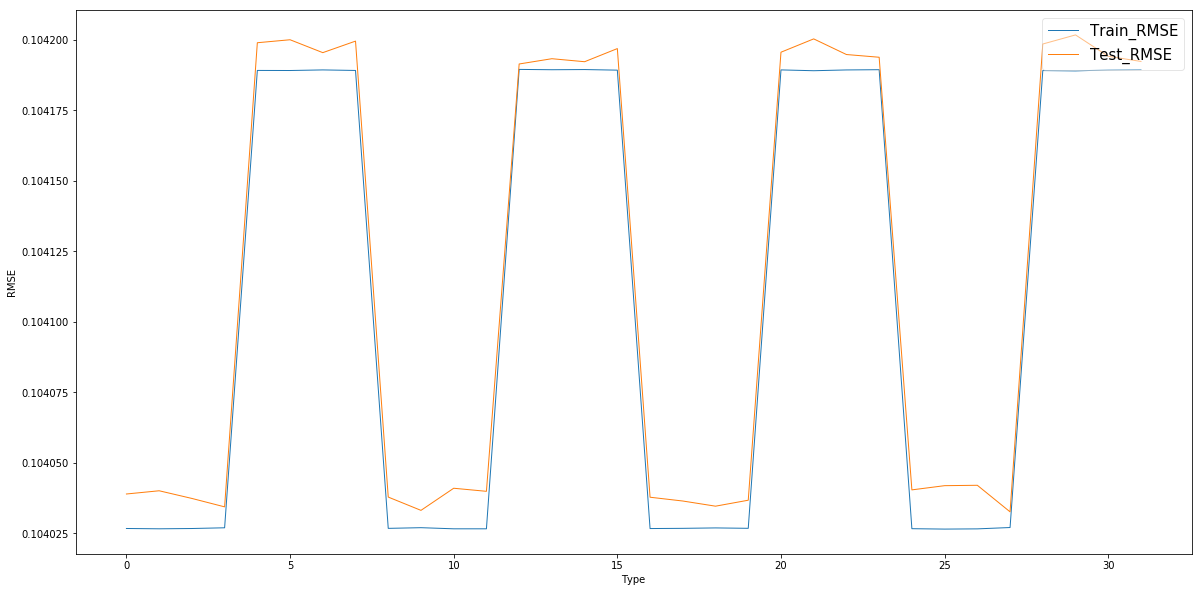

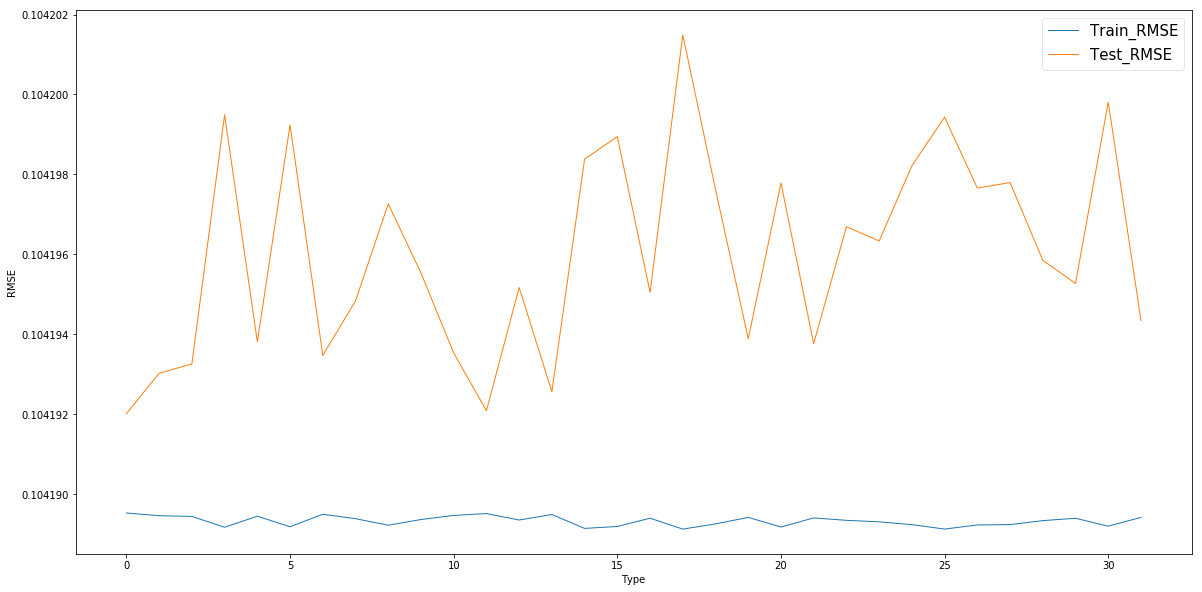

In [79]:
from sklearn.linear_model import Lasso
Data = pd.read_csv("../data/network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v
    
uniqueFiles = ['File_{0}'.format(s) for s in xrange(len((pd.unique(Data['File Name']))))]
Data.drop(labels[6],1,inplace = True)
Data_set, Lsts = MakeCombinationData(Data)

def copy(data_set):
    tmp_data_set = []
    for data in data_set:
        tmp_data = data.copy()
        tmp_data_set.append(tmp_data)
    return tmp_data_set

for alpha in 0.01,0.05,0.1:
    tmp_Data_set = copy(Data_set)
    Train_RMSE_set = []
    Test_RMSE_set = []
    for data in tmp_Data_set:
        sample = data.copy()
        target = data.pop('Size of Backup (GB)')
        lin_reg = Lasso(alpha=alpha)
        Train_RMSE, Test_RMSE = CaculateTrainandTestRSME(sample,True,lin_reg)
        Train_RMSE_set.append(Train_RMSE)
        Test_RMSE_set.append(Test_RMSE)

    Plot32Model(Train_RMSE_set, Test_RMSE_set)